## 데이터 불러오기

In [18]:
import pandas as pd

In [19]:
data = pd.read_csv('/Users/kimsihyeon/Desktop/sihyun83/insurance_dataset.csv')

In [20]:
data

,age,gender,bmi,children,smoker,region,medical_history,family_medical_history,exercise_frequency,occupation,coverage_level,charges
0,46,male,21.45,5,yes,southeast,Diabetes,NaN,Never,Blue collar,Premium,20460.307669
1,25,female,25.38,2,yes,northwest,Diabetes,High blood pressure,Occasionally,White collar,Premium,20390.899218
2,38,male,44.88,2,yes,southwest,NaN,High blood pressure,Occasionally,Blue collar,Premium,20204.476302
3,25,male,19.89,0,no,northwest,NaN,Diabetes,Rarely,White collar,Standard,11789.029843
4,49,male,38.21,3,yes,northwest,Diabetes,High blood pressure,Rarely,White collar,Standard,19268.309838
...,...,...,...,...,...,...,...,...,...,...,...,...
999995,59,male,46.67,2,no,northeast,High blood pressure,NaN,Frequently,Student,Basic,11584.134900
999996,33,male,36.83,2,no,northeast,NaN,High blood pressure,Frequently,Unemployed,Basic,9834.871456
999997,39,male,39.84,0,yes,northeast,Heart disease,High blood pressure,Rarely,Blue collar,Standard,22076.632856
999998,37,female,45.06,4,yes,northeast,High blood pressure,Diabetes,Occasionally,Unemployed,Premium,20297.618728


In [21]:
# 1. 보험료에 영향을 미치는 주요 요인 분석
# 2. 흡연 여부에 따른 비용 차이 분석
# 3. bmi에 따른 보험료 

## 데이터 전처리

In [22]:
# 데이터 전처리
data = data.copy()
categorical_cols = ['gender', 'smoker', 'region', 'medical_history', 'family_medical_history', 'exercise_frequency', 'occupation', 'coverage_level']

## EDA

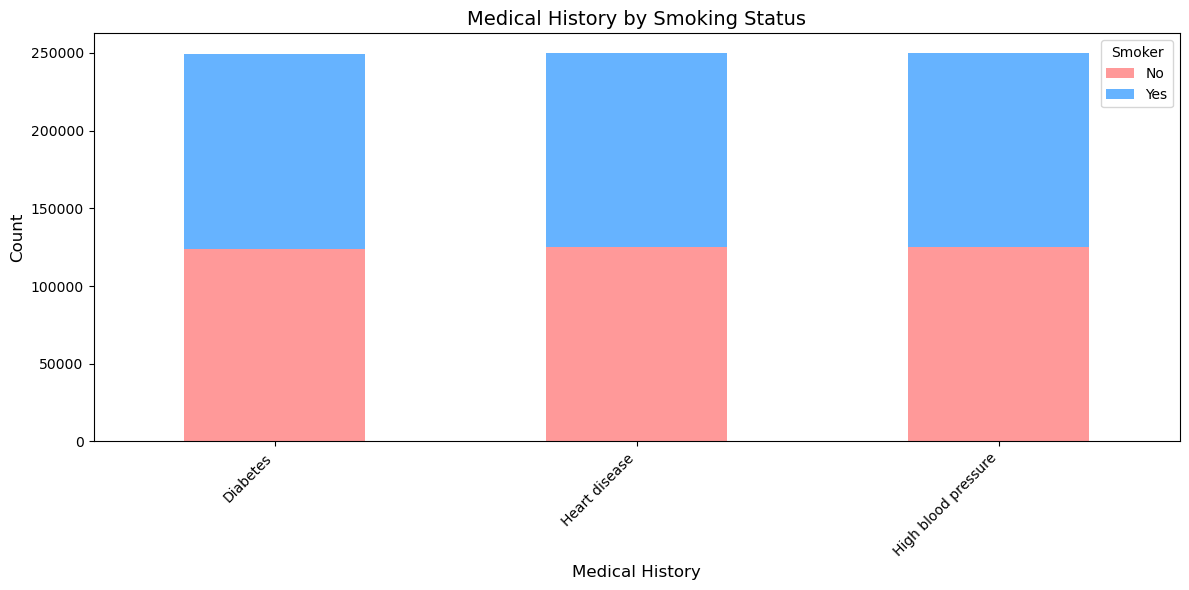

medical_history,Diabetes,Heart disease,High blood pressure
smoker,,,
no,124161,125090,125275
yes,125174,125031,124507


In [23]:
# 흡연 여부에 따른 의료 기록 분포 계산

import matplotlib.pyplot as plt

smoker_medical_history = data.groupby(['smoker', 'medical_history']).size().unstack(fill_value=0)

# 그래프 시각화
fig, ax = plt.subplots(figsize=(12, 6))
smoker_medical_history.T.plot(kind='bar', stacked=True, ax=ax, color=['#ff9999', '#66b3ff'])
ax.set_title('Medical History by Smoking Status', fontsize=14)
ax.set_ylabel('Count', fontsize=12)
ax.set_xlabel('Medical History', fontsize=12)
ax.legend(title='Smoker', labels=['No', 'Yes'])
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

smoker_medical_history

# 흡엽 여부는 크게 상관 없다

흡연 여부에 따른 평균 보험료:
 smoker
no     14234.185427
yes    19234.759386
Name: charges, dtype: float64


/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 55137 (\N{HANGUL SYLLABLE HEUB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 50668 (\N{HANGUL SYLLABLE YEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 48512 (\N{HANGUL SYLLABLE BU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 50640 (\N{HANGUL SYLLABLE E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/py

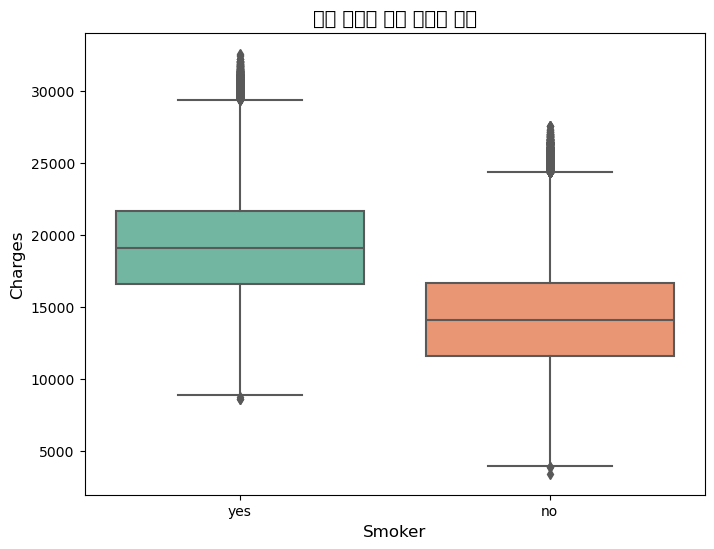

In [24]:
# 흡연 여부에 따른 평균 비용 계산

import seaborn as sns

smoker_costs = data.groupby('smoker')['charges'].mean()
print("흡연 여부에 따른 평균 보험료:\n", smoker_costs)

# 흡연 여부별 보험료 시각화
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='smoker', y='charges', palette='Set2')
plt.title("흡연 여부에 따른 보험료 차이", fontsize=14)
plt.xlabel("Smoker", fontsize=12)
plt.ylabel("Charges", fontsize=12)
plt.show()

In [25]:
# 흡연자는 비흡연자보다 평균적으로 보험료가 더 높다.
# 흡연자의 보험료 분포가 비흡연자보다 상위에 위치

In [26]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score

# 범주형 변수를 숫자로 변환
categorical_cols = ['gender', 'smoker', 'region', 'medical_history', 
                    'family_medical_history', 'exercise_frequency', 
                    'occupation', 'coverage_level']

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# 상관관계 분석
correlation = data.corr()['charges'].sort_values(ascending=False)
print("보험료와의 상관관계:\n", correlation)

보험료와의 상관관계:
 charges                   1.000000
smoker                    0.566213
coverage_level            0.186725
gender                    0.113526
bmi                       0.104429
children                  0.076801
age                       0.063390
occupation                0.025320
region                   -0.055433
exercise_frequency       -0.089342
family_medical_history   -0.253870
medical_history          -0.254810
Name: charges, dtype: float64


BMI와 보험료 간의 상관관계: 0.10


/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 50752 (\N{HANGUL SYLLABLE WA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 48372 (\N{HANGUL SYLLABLE BO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 54744 (\N{HANGUL SYLLABLE HEOM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 47308 (\N{HANGUL SYLLABLE RYO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/py

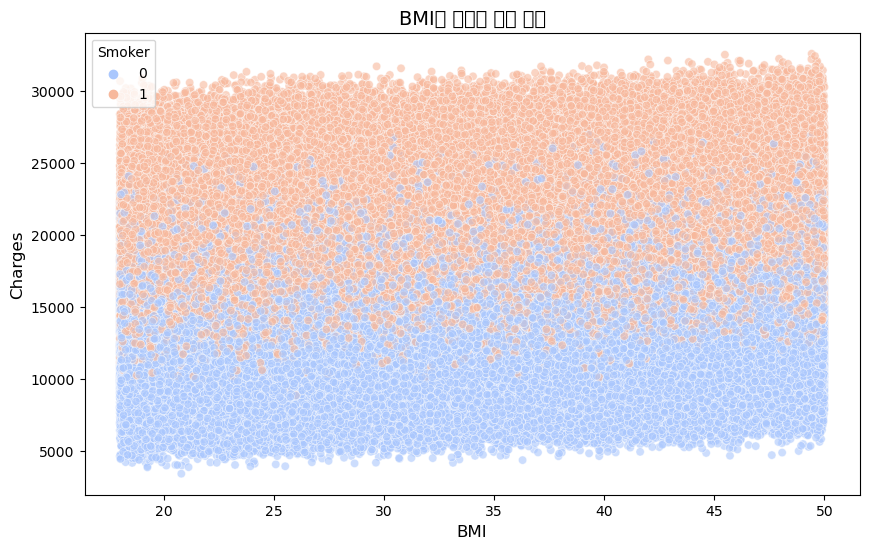

BMI 카테고리별 평균 보험료:
 bmi_category
Underweight       15944.838552
Normal            16126.315200
Overweight        16409.612234
Obese             16639.801927
Severely Obese    16902.561443
Morbidly Obese    17289.231433
Name: charges, dtype: float64


/var/folders/9g/38vn_8057td1fgmmvx7m6t2r0000gn/T/ipykernel_69478/2352467078.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bmi_charges = data.groupby('bmi_category')['charges'].mean().sort_values()
/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 52852 (\N{HANGUL SYLLABLE KA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylab

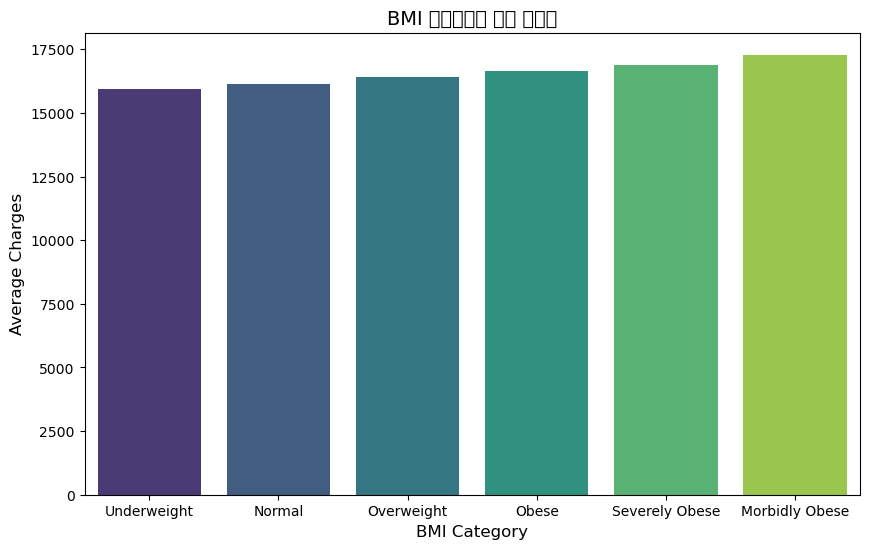

In [27]:
# BMI와 보험료 상관관계
correlation = data['bmi'].corr(data['charges'])
print(f"BMI와 보험료 간의 상관관계: {correlation:.2f}")

# BMI와 보험료 산점도 시각화
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='bmi', y='charges', alpha=0.6, hue='smoker', palette='coolwarm')
plt.title("BMI와 보험료 간의 관계", fontsize=14)
plt.xlabel("BMI", fontsize=12)
plt.ylabel("Charges", fontsize=12)
plt.legend(title="Smoker")
plt.show()

# BMI 구간별 평균 보험료
bins = [0, 18.5, 24.9, 29.9, 34.9, 40, 50]  # BMI 구간
labels = ['Underweight', 'Normal', 'Overweight', 'Obese', 'Severely Obese', 'Morbidly Obese']
data['bmi_category'] = pd.cut(data['bmi'], bins=bins, labels=labels)

bmi_charges = data.groupby('bmi_category')['charges'].mean().sort_values()
print("BMI 카테고리별 평균 보험료:\n", bmi_charges)

# BMI 카테고리별 보험료 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x=bmi_charges.index, y=bmi_charges.values, palette='viridis')
plt.title("BMI 카테고리별 평균 보험료", fontsize=14)
plt.xlabel("BMI Category", fontsize=12)
plt.ylabel("Average Charges", fontsize=12)
plt.show()


In [28]:
# BMI와 보험료 상관관계
correlation = data['bmi'].corr(data['charges'])
print(f"BMI와 보험료 간의 상관관계: {correlation:.2f}")

BMI와 보험료 간의 상관관계: 0.10


/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 50752 (\N{HANGUL SYLLABLE WA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 48372 (\N{HANGUL SYLLABLE BO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 54744 (\N{HANGUL SYLLABLE HEOM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 47308 (\N{HANGUL SYLLABLE RYO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/py

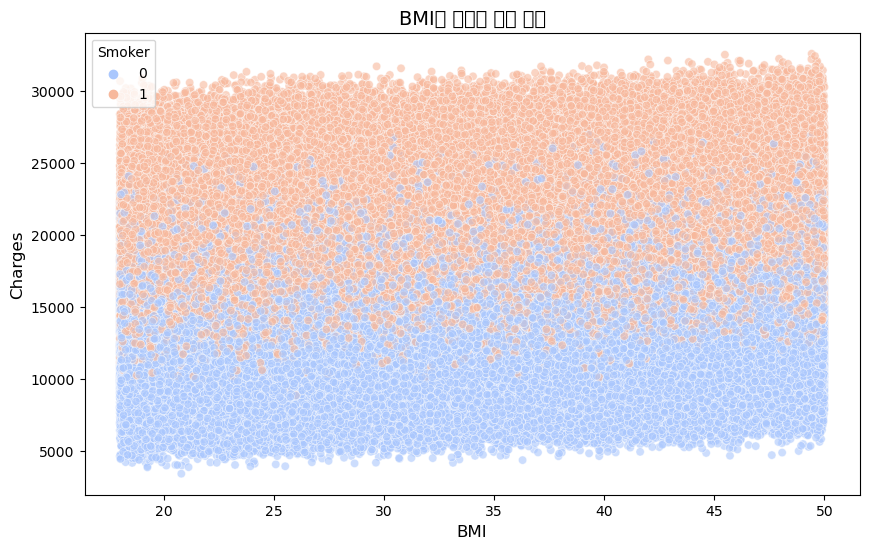

BMI 카테고리별 평균 보험료:
 bmi_category
Underweight       15944.838552
Normal            16126.315200
Overweight        16409.612234
Obese             16639.801927
Severely Obese    16902.561443
Morbidly Obese    17289.231433
Name: charges, dtype: float64


/var/folders/9g/38vn_8057td1fgmmvx7m6t2r0000gn/T/ipykernel_69478/3494846790.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bmi_charges = data.groupby('bmi_category')['charges'].mean().sort_values()


In [29]:
# BMI와 보험료 산점도 시각화

import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='bmi', y='charges', alpha=0.6, hue='smoker', palette='coolwarm')
plt.title("BMI와 보험료 간의 관계", fontsize=14)
plt.xlabel("BMI", fontsize=12)
plt.ylabel("Charges", fontsize=12)
plt.legend(title="Smoker")
plt.show()

# BMI 구간별 평균 보험료
bins = [0, 18.5, 24.9, 29.9, 34.9, 40, 50]  # BMI 구간
labels = ['Underweight', 'Normal', 'Overweight', 'Obese', 'Severely Obese', 'Morbidly Obese']
data['bmi_category'] = pd.cut(data['bmi'], bins=bins, labels=labels)

bmi_charges = data.groupby('bmi_category')['charges'].mean().sort_values()
print("BMI 카테고리별 평균 보험료:\n", bmi_charges)

/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 52852 (\N{HANGUL SYLLABLE KA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 53580 (\N{HANGUL SYLLABLE TE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 44256 (\N{HANGUL SYLLABLE GO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.

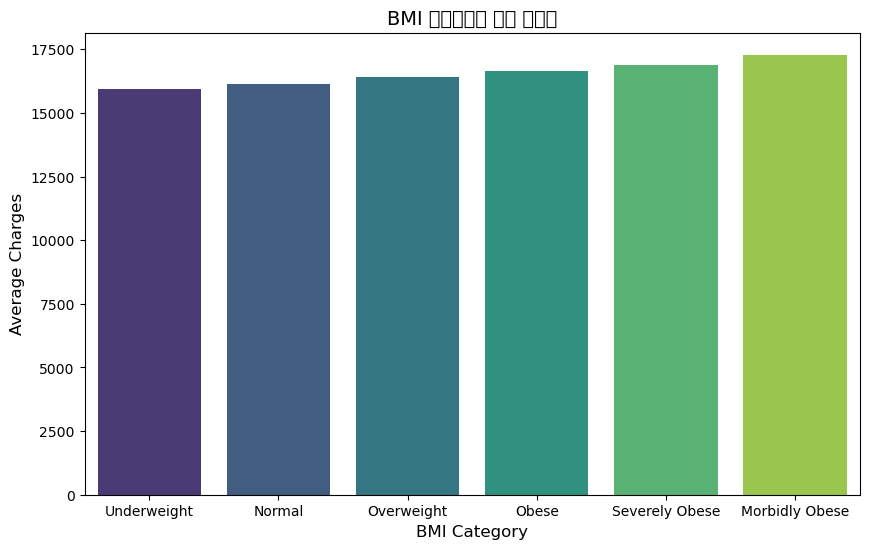

In [30]:
# BMI 카테고리별 보험료 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x=bmi_charges.index, y=bmi_charges.values, palette='viridis')
plt.title("BMI 카테고리별 평균 보험료", fontsize=14)
plt.xlabel("BMI Category", fontsize=12)
plt.ylabel("Average Charges", fontsize=12)
plt.show()

In [31]:
data

,age,gender,bmi,children,smoker,region,medical_history,family_medical_history,exercise_frequency,occupation,coverage_level,charges,bmi_category
0,46,1,21.45,5,1,2,0,3,1,0,1,20460.307669,Normal
1,25,0,25.38,2,1,1,0,2,2,3,1,20390.899218,Overweight
2,38,1,44.88,2,1,3,3,2,2,0,1,20204.476302,Morbidly Obese
3,25,1,19.89,0,0,1,3,0,3,3,2,11789.029843,Normal
4,49,1,38.21,3,1,1,0,2,3,3,2,19268.309838,Severely Obese
...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,59,1,46.67,2,0,0,2,3,0,1,0,11584.134900,Morbidly Obese
999996,33,1,36.83,2,0,0,3,2,0,2,0,9834.871456,Severely Obese
999997,39,1,39.84,0,1,0,1,2,3,0,2,22076.632856,Severely Obese
999998,37,0,45.06,4,1,0,2,0,2,2,1,20297.618728,Morbidly Obese


In [32]:
# 운동 빈도와 질병 발생률 간의 관계 분석 함수
def analyze_exercise_and_disease(data, exercise_col, medical_col):
    # 운동 빈도별 그룹화
    exercise_groups = data.groupby(exercise_col)
    
    # 각 그룹의 질병 발생률 계산
    disease_stats = {}
    for group, group_data in exercise_groups:
        total = len(group_data)
        has_disease = len(group_data[group_data[medical_col] != "None"])  # 병력이 있는 경우 필터링
        disease_stats[group] = has_disease / total if total > 0 else 0
    
    return disease_stats

# 운동 빈도와 질병 발생률 간의 관계 분석
exercise_disease_relationship = analyze_exercise_and_disease(data, "exercise_frequency", "medical_history")

# 결과 확인
exercise_disease_relationship

{0: 1.0, 1: 1.0, 2: 1.0, 3: 1.0}

In [34]:
# 범주형 칼럼 자동 선택
categorical_columns = data.select_dtypes(include=['object','category']).columns

# 더미 변수로 변환
data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

## Train Test Split

In [35]:
from sklearn.model_selection import train_test_split

# 주요 변수로 회귀 분석
X = data.drop(columns=['charges'])
y = data['charges']

# 데이터 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Machine Learning

### 1. Linear Regression

In [37]:
from sklearn.linear_model import LinearRegression

# 선형 회귀 모델
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# 모델 성능 평가 및 중요 변수 확인
r2 = r2_score(y_test, y_pred)

print(f'R2 (Coefficient of Determination): {r2}')

R2 (Coefficient of Determination): 0.5294350838163312


In [39]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
from sklearn.linear_model import Ridge
import numpy as np

# 릿지 회귀 모델 생성 (alpha=1.0은 기본값)
ridge_model = Ridge(alpha=10)

# 모델 훈련
ridge_model.fit(X_train, y_train)

# 테스트 데이터 예측
y_pred = ridge_model.predict(X_test)

# 평가 지표 계산
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)

# 결과 출력
print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R² (Coefficient of Determination): {r2}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

Mean Squared Error (MSE): 9157532.371490661
Mean Absolute Error (MAE): 2472.4727755139324
R² (Coefficient of Determination): 0.5294351164895914
Root Mean Squared Error (RMSE): 3026.1414989208056


## 변수 중요도